In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

Load Training Data ~ 300 images

In [3]:
#Required size for input channels is 299 * 299 
transform = transforms.Compose([transforms.Resize(299),
                                transforms.CenterCrop(299),
                                transforms.ToTensor()])
train_dataset = datasets.ImageFolder(
        'dataset/train_images',
        transform=transform)
test_dataset = datasets.ImageFolder(
        'dataset/test_images',
        transform=transform)
val_dataset = datasets.ImageFolder(
        'dataset/val_images',
        transform=transform
)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1)

In [4]:
for X, y in train_dataloader:
    print(X.shape)
    print(X)
    print(y.shape,y.dtype)
    print(y)
    break

torch.Size([1, 3, 299, 299])
tensor([[[[0.3961, 0.4314, 0.4706,  ..., 0.2392, 0.2353, 0.2314],
          [0.4314, 0.4588, 0.4863,  ..., 0.2431, 0.2392, 0.2353],
          [0.4667, 0.4824, 0.4980,  ..., 0.2431, 0.2392, 0.2353],
          ...,
          [0.0784, 0.0824, 0.0863,  ..., 0.8863, 0.8471, 0.7843],
          [0.0784, 0.0824, 0.0863,  ..., 0.8902, 0.8510, 0.7922],
          [0.0784, 0.0824, 0.0863,  ..., 0.8902, 0.8510, 0.7961]],

         [[0.3647, 0.4000, 0.4392,  ..., 0.1882, 0.1765, 0.1647],
          [0.4000, 0.4275, 0.4549,  ..., 0.1922, 0.1804, 0.1686],
          [0.4353, 0.4510, 0.4667,  ..., 0.1922, 0.1804, 0.1686],
          ...,
          [0.0784, 0.0824, 0.0863,  ..., 0.8196, 0.7686, 0.6902],
          [0.0745, 0.0784, 0.0863,  ..., 0.8235, 0.7725, 0.6980],
          [0.0745, 0.0784, 0.0863,  ..., 0.8235, 0.7725, 0.7020]],

         [[0.2902, 0.3255, 0.3647,  ..., 0.1569, 0.1490, 0.1373],
          [0.3255, 0.3529, 0.3804,  ..., 0.1608, 0.1529, 0.1412],
          [0.

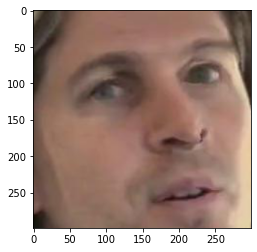

In [5]:
#Testing face load with first image
import matplotlib.pyplot as plt
images, labels = next(iter(train_dataloader))
plt.imshow(images[0].permute(1, 2, 0))

Defining custom class for xception model

In [23]:
class Xception_Net(nn.Module):
    def __init__(
        self,
        num_classes: int = 100,
    ) -> None:
        super(Xception_Net, self).__init__()
        
        #Entry flow layer 1
        self.entry_flow_1 = nn.Sequential(
            #input channels for images is 3
            nn.Conv2d(3, 32, kernel_size = (3, 3), stride = (2, 2), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(32, 64, kernel_size = (3, 3), padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True)
        )
        
        #Entry flow layer 2 - Separable convolution layer
        self.entry_flow_2_sep_conv = nn.Sequential(
            #performing depthwise and pointwise convolutions
            nn.Conv2d(64, 128, kernel_size = (3, 3), padding=1),
            nn.Conv2d(128, 128, kernel_size = (1, 1)),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(128, 128, kernel_size = (3, 3), padding=1),
            nn.Conv2d(128, 128, kernel_size = (1, 1)),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2), padding=1)
            
        )
        
        #Entry flow layer 2 - Residual Convoltuional layer
        self.entry_flow_2_residual = nn.Sequential(
            #with kernel size 1, padding is set to default 0
            nn.Conv2d(64, 128, kernel_size = (1, 1), stride = (2, 2))    
        )
        
        #Entry flow layer 3 - Separable convolution layer
        self.entry_flow_3_sep_conv = nn.Sequential(
            #performing depthwise and pointwise convolutions
            nn.ReLU(inplace = True),
            nn.Conv2d(128, 256, kernel_size = (3, 3), padding=1),
            nn.Conv2d(256, 256, kernel_size = (1, 1)),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(256, 256, kernel_size = (3, 3), padding=1),
            nn.Conv2d(256, 256, kernel_size = (1, 1)),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2), padding=1)
            
        )
        
        #Entry flow layer 3 - Residual Convoltuional layer
        self.entry_flow_3_residual = nn.Sequential(
            #with kernel size 1, padding is set to default 0
            nn.Conv2d(128, 256, kernel_size = (1, 1), stride = (2, 2)),
            nn.BatchNorm2d(256)
        )
        
        #Entry flow layer 4 - Separable convolution layer
        self.entry_flow_4_sep_conv = nn.Sequential(
            nn.ReLU(inplace = True),
            nn.Conv2d(256, 728, kernel_size = (3, 3), padding=1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding=1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2), padding=1)
            
        )
        
        #Entry flow layer 4 - Residual Convoltuional layer
        self.entry_flow_4_residual = nn.Sequential(
            #with kernel size 1, padding is set to default 0
            nn.Conv2d(256, 728, kernel_size = (1, 1), stride = (2, 2)),
            nn.BatchNorm2d(728)
        )
        
        ######## Middle Flow ##########
        # 3 separable convolution layers
        self.middle_flow = nn.Sequential(
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728)
        )
        
        ######## Exit Flow #########
        #Exit flow layer 1 - Separable convolution layer
        self.exit_flow_1_sep_conv = nn.Sequential(
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 1024, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(1024, 1024, kernel_size = (1, 1)),
            nn.BatchNorm2d(1024),
            nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2), padding=1)
        )
        
        #Exit flow layer 1 - Residual Convoltuional layer
        self.exit_flow_1_residual = nn.Sequential(
            #with kernel size 1, padding is set to default 0
            nn.Conv2d(728, 1024, kernel_size = (1, 1), stride = (2, 2)),
            nn.BatchNorm2d(1024)
        )
        
        #Exit flow layer 2 - Separable convolution layer
        self.exit_flow_2_sep_conv = nn.Sequential(
            nn.Conv2d(1024, 1536, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(1536, 1536, kernel_size = (1, 1)),
            nn.BatchNorm2d(1536),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(1536, 2048, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(2048, 2048, kernel_size = (1, 1)),
            nn.BatchNorm2d(2048),
            nn.ReLU(inplace = True),
            
            #global average pooling
            nn.AdaptiveAvgPool2d(None),
            
            #final linear layer
            nn.Linear(2048, num_classes)
        )
        

        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        #entry flow
        x = self.entry_flow_1(x)
        x = self.entry_flow_2_sep_conv(x) + self.entry_flow_2_residual(x)
        x = self.entry_flow_3_sep_conv(x) + self.entry_flow_3_residual(x)
        x = self.entry_flow_4_sep_conv(x) + self.entry_flow_4_residual(x)

        #middle flow is repeated 8 times
        for i in range(8):
            x = self.middle_flow(x)
        
        #exit flow
        x = self.exit_flow_1_sep_conv(x) + self.exit_flow_1_residual(x)
        x = self.exit_flow_2_sep_conv(x)
        
        return x

In [6]:
class Xception_Net(nn.Module):
    def __init__(
        self,
        num_classes: int = 2,
    ) -> None:
        super(Xception_Net, self).__init__()
        
        #Entry flow layer 1
        self.entry_flow_1 = nn.Sequential(
            #input channels for images is 3
            nn.Conv2d(3, 32, kernel_size = (3, 3), stride = (2, 2), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(32, 64, kernel_size = (3, 3), padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True)
        )
        
        #Entry flow layer 2 - Separable convolution layer
        self.entry_flow_2_sep_conv = nn.Sequential(
            #performing depthwise and pointwise convolutions
            nn.Conv2d(64, 128, kernel_size = (3, 3), padding=1),
            nn.Conv2d(128, 128, kernel_size = (1, 1)),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(128, 128, kernel_size = (3, 3), padding=1),
            nn.Conv2d(128, 128, kernel_size = (1, 1)),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2), padding=1)
            
        )
        
        #Entry flow layer 2 - Residual Convoltuional layer
        self.entry_flow_2_residual = nn.Sequential(
            #with kernel size 1, padding is set to default 0
            nn.Conv2d(64, 128, kernel_size = (1, 1), stride = (2, 2))    
        )
        
        #Entry flow layer 3 - Separable convolution layer
        self.entry_flow_3_sep_conv = nn.Sequential(
            #performing depthwise and pointwise convolutions
            nn.ReLU(inplace = True),
            nn.Conv2d(128, 256, kernel_size = (3, 3), padding=1),
            nn.Conv2d(256, 256, kernel_size = (1, 1)),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(256, 256, kernel_size = (3, 3), padding=1),
            nn.Conv2d(256, 256, kernel_size = (1, 1)),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2), padding=1)
            
        )
        
        #Entry flow layer 3 - Residual Convoltuional layer
        self.entry_flow_3_residual = nn.Sequential(
            #with kernel size 1, padding is set to default 0
            nn.Conv2d(128, 256, kernel_size = (1, 1), stride = (2, 2)),
            nn.BatchNorm2d(256)
        )
        
        #Entry flow layer 4 - Separable convolution layer
        self.entry_flow_4_sep_conv = nn.Sequential(
            nn.ReLU(inplace = True),
            nn.Conv2d(256, 728, kernel_size = (3, 3), padding=1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding=1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2), padding=1)
            
        )
        
        #Entry flow layer 4 - Residual Convoltuional layer
        self.entry_flow_4_residual = nn.Sequential(
            #with kernel size 1, padding is set to default 0
            nn.Conv2d(256, 728, kernel_size = (1, 1), stride = (2, 2)),
            nn.BatchNorm2d(728)
        )
        
        ######## Middle Flow ##########
        # 3 separable convolution layers
        self.middle_flow = nn.Sequential(
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728)
        )
        
        ######## Exit Flow #########
        #Exit flow layer 1 - Separable convolution layer
        self.exit_flow_1_sep_conv = nn.Sequential(
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 728, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(728, 728, kernel_size = (1, 1)),
            nn.BatchNorm2d(728),
            
            nn.ReLU(inplace = True),
            nn.Conv2d(728, 1024, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(1024, 1024, kernel_size = (1, 1)),
            nn.BatchNorm2d(1024),
            nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2), padding=1)
        )
        
        #Exit flow layer 1 - Residual Convoltuional layer
        self.exit_flow_1_residual = nn.Sequential(
            #with kernel size 1, padding is set to default 0
            nn.Conv2d(728, 1024, kernel_size = (1, 1), stride = (2, 2)),
            nn.BatchNorm2d(1024)
        )
        
        #Exit flow layer 2 - Separable convolution layer
        self.exit_flow_2_sep_conv = nn.Sequential(
            nn.Conv2d(1024, 1536, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(1536, 1536, kernel_size = (1, 1)),
            nn.BatchNorm2d(1536),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(1536, 2048, kernel_size = (3, 3), padding = 1),
            nn.Conv2d(2048, 2048, kernel_size = (1, 1)),
            nn.BatchNorm2d(2048),
            nn.ReLU(inplace = True),
            
            #global average pooling
            #nn.AdaptiveAvgPool2d((1,1)),
            
            #final linear layer
            #nn.Linear(2048, num_classes)
        )
        
        self.linear = nn.Linear(2048, num_classes)
        

        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        #entry flow
        x = self.entry_flow_1(x)
        x = self.entry_flow_2_sep_conv(x) + self.entry_flow_2_residual(x)
        x = self.entry_flow_3_sep_conv(x) + self.entry_flow_3_residual(x)
        x = self.entry_flow_4_sep_conv(x) + self.entry_flow_4_residual(x)

        #middle flow is repeated 8 times
        for i in range(8):
            x = self.middle_flow(x)
        
        #exit flow
        x = self.exit_flow_1_sep_conv(x) + self.exit_flow_1_residual(x)
        x = self.exit_flow_2_sep_conv(x)
        
        """
        Move global average pooling and final linear layer here.
        """
        avg = nn.functional.adaptive_avg_pool2d(x,(1,1))
        flat = avg.view(avg.size(0),-1)
        
        x = self.linear(flat)
        
        return x
        

In [7]:
device = torch.device("cuda:0") # if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [8]:
net = Xception_Net().to(device)

In [9]:
net

Xception_Net(
  (entry_flow_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (entry_flow_2_sep_conv): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=(3, 3), stride=(

In [10]:
class depthwise_separable_conv(nn.Module):
    def __init__(self, nin, nout, kernel_size, padding, bias=False):
        super(depthwise_separable_conv, self).__init__()
        self.depthwise = nn.Conv2d(nin, nin, kernel_size=kernel_size, padding=padding, groups=nin, bias=bias)
        self.pointwise = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)

    def forward(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out
    
class Xception(nn.Module):
    def __init__(self, input_channel, num_classes=2):
        super(Xception, self).__init__()
        
        # Entry Flow
        self.entry_flow_1 = nn.Sequential(
            nn.Conv2d(input_channel, 32, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )
        
        self.entry_flow_2 = nn.Sequential(
            depthwise_separable_conv(64, 128, 3, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            
            depthwise_separable_conv(128, 128, 3, 1),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.entry_flow_2_residual = nn.Conv2d(64, 128, kernel_size=1, stride=2, padding=0)
        
        self.entry_flow_3 = nn.Sequential(
            nn.ReLU(True),
            depthwise_separable_conv(128, 256, 3, 1),
            nn.BatchNorm2d(256),
            
            nn.ReLU(True),
            depthwise_separable_conv(256, 256, 3, 1),
            nn.BatchNorm2d(256),
            
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.entry_flow_3_residual = nn.Conv2d(128, 256, kernel_size=1, stride=2, padding=0)
        
        self.entry_flow_4 = nn.Sequential(
            nn.ReLU(True),
            depthwise_separable_conv(256, 728, 3, 1),
            nn.BatchNorm2d(728),
            
            nn.ReLU(True),
            depthwise_separable_conv(728, 728, 3, 1),
            nn.BatchNorm2d(728),
            
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.entry_flow_4_residual = nn.Conv2d(256, 728, kernel_size=1, stride=2, padding=0)
        
        # Middle Flow
        self.middle_flow = nn.Sequential(
            nn.ReLU(True),
            depthwise_separable_conv(728, 728, 3, 1),
            nn.BatchNorm2d(728),
            
            nn.ReLU(True),
            depthwise_separable_conv(728, 728, 3, 1),
            nn.BatchNorm2d(728),
            
            nn.ReLU(True),
            depthwise_separable_conv(728, 728, 3, 1),
            nn.BatchNorm2d(728)
        )
        
        # Exit Flow
        self.exit_flow_1 = nn.Sequential(
            nn.ReLU(True),
            depthwise_separable_conv(728, 728, 3, 1),
            nn.BatchNorm2d(728),
            
            nn.ReLU(True),
            depthwise_separable_conv(728, 1024, 3, 1),
            nn.BatchNorm2d(1024),
            
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.exit_flow_1_residual = nn.Conv2d(728, 1024, kernel_size=1, stride=2, padding=0)
        self.exit_flow_2 = nn.Sequential(
            depthwise_separable_conv(1024, 1536, 3, 1),
            nn.BatchNorm2d(1536),
            nn.ReLU(True),
            
            depthwise_separable_conv(1536, 2048, 3, 1),
            nn.BatchNorm2d(2048),
            nn.ReLU(True)
        )
        
        self.linear = nn.Linear(2048, num_classes)
        
    def forward(self, x):
        entry_out1 = self.entry_flow_1(x)
        entry_out2 = self.entry_flow_2(entry_out1) + self.entry_flow_2_residual(entry_out1)
        entry_out3 = self.entry_flow_3(entry_out2) + self.entry_flow_3_residual(entry_out2)
        entry_out = self.entry_flow_4(entry_out3) + self.entry_flow_4_residual(entry_out3)
        
        middle_out = self.middle_flow(entry_out) + entry_out
        
        for i in range(7):
            middle_out = self.middle_flow(middle_out) + middle_out

        exit_out1 = self.exit_flow_1(middle_out) + self.exit_flow_1_residual(middle_out)
        exit_out2 = self.exit_flow_2(exit_out1)

        exit_avg_pool = nn.functional.adaptive_avg_pool2d(exit_out2, (1, 1))                
        exit_avg_pool_flat = exit_avg_pool.view(exit_avg_pool.size(0), -1)

        output = self.linear(exit_avg_pool_flat)
        
        return output

In [11]:
net = Xception(3, 2)
net.to(device)

Xception(
  (entry_flow_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (entry_flow_2): Sequential(
    (0): depthwise_separable_conv(
      (depthwise): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
      (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): depthwise_separable_conv(
      (depthwise): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=128, bias=False)
      (pointwise): Conv2d(128, 128, 

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)

In [18]:
loss_record = []

for t in range(10):
    print(f"Epoch {t+1}\n-------------------------------")
    size = len(train_dataloader.dataset)
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = net(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
    #validattion
    size = len(val_dataloader.dataset)
    test_loss, correct = 0, 0
    for batch, (X, y) in enumerate(val_dataloader):
        X, y = X.to(device), y.to(device)
        pred = net(X)
        
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= size
    correct /= size
    print(f"Validation Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
print('Done')

Epoch 1
-------------------------------
loss: 3.055406  [    0/  298]
loss: 0.017844  [  100/  298]
loss: 0.008814  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.712117 

Epoch 2
-------------------------------
loss: 3.009448  [    0/  298]
loss: 0.017997  [  100/  298]
loss: 0.008837  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.704873 

Epoch 3
-------------------------------
loss: 2.966273  [    0/  298]
loss: 0.017990  [  100/  298]
loss: 0.008818  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.702604 

Epoch 4
-------------------------------
loss: 2.953216  [    0/  298]
loss: 0.018067  [  100/  298]
loss: 0.008874  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.692939 

Epoch 5
-------------------------------
loss: 2.881744  [    0/  298]
loss: 0.018200  [  100/  298]
loss: 0.008849  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.687058 

Epoch 6
-------------------------------
loss: 2.836462  [   

In [15]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
    #validattion
    size = len(val_dataloader.dataset)
    test_loss, correct = 0, 0
    for batch, (X, y) in enumerate(val_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= size
    correct /= size
    print(f"Validation Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [16]:
loss_record = []

for t in range(10):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader,net,loss_fn,optimizer)
    #test(val_dataloader,net)
print('Done!')

Epoch 1
-------------------------------
loss: 1.134849  [    0/  298]
loss: 0.016328  [  100/  298]
loss: 0.008252  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.775844 

Epoch 2
-------------------------------
loss: 3.445254  [    0/  298]
loss: 0.017362  [  100/  298]
loss: 0.008642  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.771424 

Epoch 3
-------------------------------
loss: 3.438187  [    0/  298]
loss: 0.017247  [  100/  298]
loss: 0.008677  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.769818 

Epoch 4
-------------------------------
loss: 3.418742  [    0/  298]
loss: 0.017235  [  100/  298]
loss: 0.008559  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.761121 

Epoch 5
-------------------------------
loss: 3.384437  [    0/  298]
loss: 0.017353  [  100/  298]
loss: 0.008713  [  200/  298]
Validation Error: 
 Accuracy: 18.0%, Avg loss: 2.754007 

Epoch 6
-------------------------------
loss: 3.359261  [   

In [ ]:
loss_record = []
for epoch in range(10):
    

Text(0.5, 1.0, 'real')

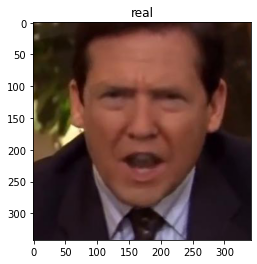

In [86]:
from PIL import Image
import matplotlib.pyplot as plt
classes = ['fake','real']

transform = transforms.Compose([transforms.Resize(299),
                                transforms.CenterCrop(299),
                                transforms.ToTensor()])

img = Image.open('dataset/test_images/fake/df1.jpg')
imgt = transform(img)

pre = net(imgt.unsqueeze(0).cuda())
pre = pre.data.argmax().item()

plt.imshow(img)
plt.title(classes[pre])